# We input our basic libraries

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mental-health-social-media/Mental-Health-Twitter.csv


In [2]:
data=pd.read_csv("/kaggle/input/mental-health-social-media/Mental-Health-Twitter.csv",index_col=0)

In [3]:
data.head()

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [4]:
data.info()
print(len(data))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_id       20000 non-null  int64 
 1   post_created  20000 non-null  object
 2   post_text     20000 non-null  object
 3   user_id       20000 non-null  int64 
 4   followers     20000 non-null  int64 
 5   friends       20000 non-null  int64 
 6   favourites    20000 non-null  int64 
 7   statuses      20000 non-null  int64 
 8   retweets      20000 non-null  int64 
 9   label         20000 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 1.7+ MB
20000


# The data is balanced

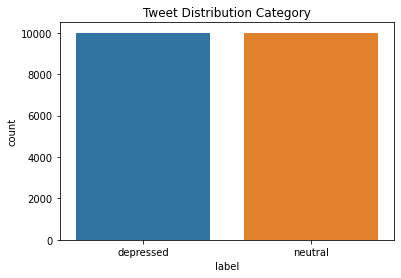

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the categories
categories = ['depressed', 'neutral']

# Create the countplot
sns.countplot(data=data, x="label")

# Set the title
plt.title("Tweet Distribution Category")

# Set the x-axis labels based on the categories
plt.xticks(range(len(categories)), categories)

# Display the plot
plt.show()


# Import our another library for Natural Language Processing

In [6]:
import re
import nltk

# Downloading necessary files

In [7]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [8]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Word lemmatizer is necessary to lemmatize our words

In [9]:
lemma=nltk.WordNetLemmatizer()

# I have done most job in this for loop

In [10]:
text_list=[]
for text in data.post_text:
    description=re.sub("[^a-zA-Z]"," ",text) # a remover from text without letters
    description=description.lower() # it provides small lettet
    description=nltk.word_tokenize(text) # it splites our data into tokens (words)
    #description=[word for word in text if word not in set(stopwords("english"))] It removes stop words from our data. We do it later to make faster our algorithm.
    description=[lemma.lemmatize(word) for word in text] # it provides to lemmatize our words for example see=(see,saw,seen)
    description="".join(description) # it makes sentences from our clean words
    text_list.append(description) # It addes to list
    
    
    

# Count Vectorizer provides to count our word

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer=CountVectorizer(max_features=600,stop_words="english") # I have found most using 600 words and remove english stop (unnecessary) words
sparce_matrix=count_vectorizer.fit_transform(text_list).toarray()

In [12]:
depressed = data[data['label']==1]
neutral = data[data['label']==0]

In [13]:
depressed.head()

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


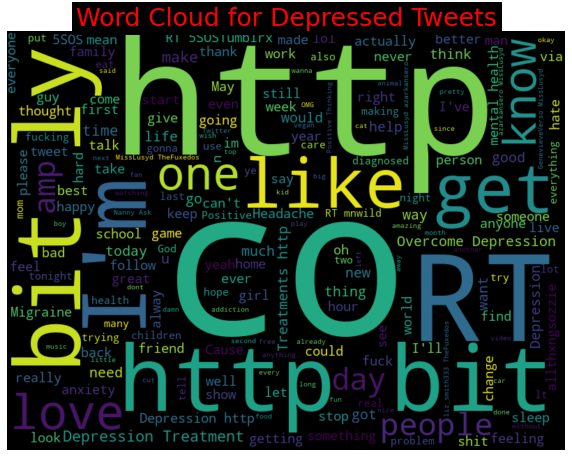

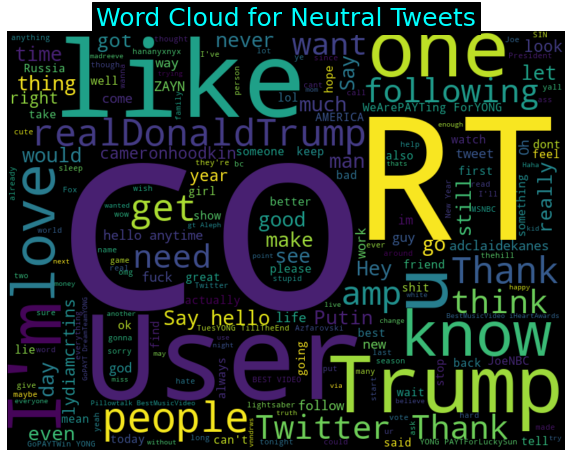

In [14]:
# Import the libraries
import wordcloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

stop_words = stopwords.words("english") + ["https"]


# Create a list of depressed tweets
depressed_tweets = depressed['post_text'].tolist()

# Join the depressed tweets into a single string
depressed_text = " ".join(depressed_tweets)

# Create a WordCloud object with some parameters
wc1 = wordcloud.WordCloud(background_color='black', width=800, height=600,stopwords=stop_words)

# Generate the word cloud from the depressed text
wc1.generate(depressed_text)

# Plot the word cloud using matplotlib.pyplot
plt.figure(figsize=(10, 8))
plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Depressed Tweets", fontsize=25, color='red',backgroundcolor='black')

plt.show()

# Create a list of neutral tweets
neutral_tweets = neutral['post_text'].tolist()

# Join the neutral tweets into a single string
neutral_text = " ".join(neutral_tweets)

# Create a WordCloud object with some parameters
wc2 = wordcloud.WordCloud(background_color='black', width=800, height=600,stopwords=stop_words)

# Generate the word cloud from the neutral text
wc2.generate(neutral_text)

# Plot the word cloud using matplotlib.pyplot
plt.figure(figsize=(10, 8))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Neutral Tweets",fontsize=25, color='cyan',backgroundcolor='black')
plt.show()


# Set x and y variables

In [15]:
x=sparce_matrix
y=data["label"].values

# Split our data into train and test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# We use this algorithm to predict who is in depression or not

#  GaussianNB

Accuracy: 0.7721666666666667
F1 Score: 0.7696714406065712
Precision: 0.7827278958190541
Recall: 0.7570434206165064


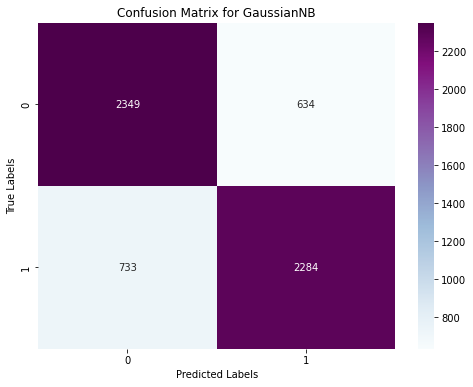

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      2983
           1       0.78      0.76      0.77      3017

    accuracy                           0.77      6000
   macro avg       0.77      0.77      0.77      6000
weighted avg       0.77      0.77      0.77      6000



In [18]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB

# Create an instance of the Gaussian Naive Bayes model
ga = GaussianNB()

# Train the model
ga.fit(x_train, y_train)

# Testing our algorithm and print accuracy
ga_score=accuracy = ga.score(x_test, y_test)
print("Accuracy:", accuracy)

# Make predictions on the test set
y_pred = ga.predict(x_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the metrics
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Generate and plot the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for GaussianNB")
plt.show()

# Generate and print the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


# **RandomForestClassifier**

Accuracy: 0.824223365933321
F1 Score: 0.8237503343892996
Precision: 0.821388367729831
Recall: 0.8235555187272124
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      2983
           1       0.83      0.80      0.82      3017

    accuracy                           0.82      6000
   macro avg       0.82      0.82      0.82      6000
weighted avg       0.82      0.82      0.82      6000


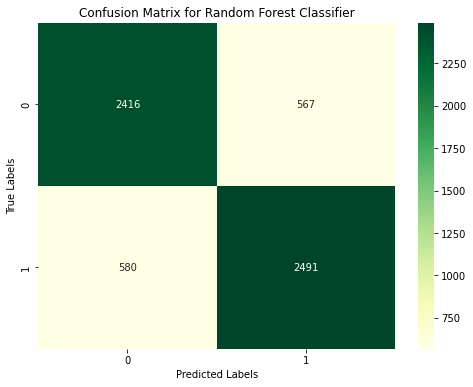

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create an instance of the Random Forest model
rf = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best model with the tuned hyperparameters
rf_best = grid_search.best_estimator_

# Testing the algorithm and print accuracy
rf_score = rf_best.score(x_test, y_test)
print("Accuracy:", rf_score)

# Make predictions on the test set
y_pred = rf_best.predict(x_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the metrics
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Generate and plot the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGn")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

# Generate and print the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


# GradientBoostingClassifier

Accuracy: 0.7671666666666667
F1 Score: 0.7968000000000001
Precision: 0.7099533437013997
Recall: 0.9078554855817037


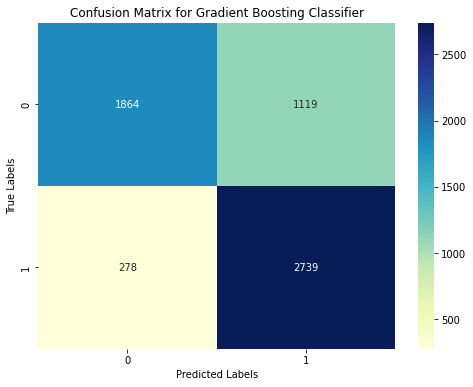

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.62      0.73      2983
           1       0.71      0.91      0.80      3017

    accuracy                           0.77      6000
   macro avg       0.79      0.77      0.76      6000
weighted avg       0.79      0.77      0.76      6000



In [20]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier

# Create an instance of the Gradient Boosting model
gb = GradientBoostingClassifier()

# Train the model
gb.fit(x_train, y_train)

# Testing the algorithm and print accuracy
gb_score=accuracy = gb.score(x_test, y_test)
print("Accuracy:", accuracy)

# Make predictions on the test set
y_pred = gb.predict(x_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the metrics
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Generate and plot the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.show()

# Generate and print the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


# KNeighborsClassifier

Accuracy: 0.7431666666666666
F1 Score: 0.7340811044003451
Precision: 0.765658747300216
Recall: 0.7050049718263175


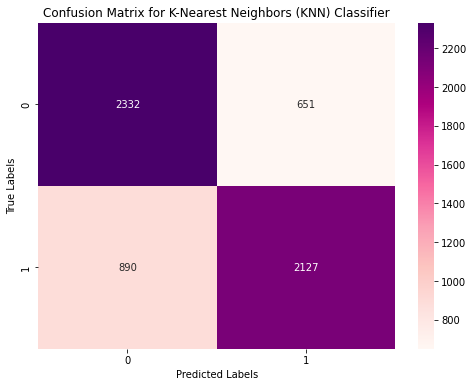

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      2983
           1       0.77      0.71      0.73      3017

    accuracy                           0.74      6000
   macro avg       0.74      0.74      0.74      6000
weighted avg       0.74      0.74      0.74      6000



In [21]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNN model
knn = KNeighborsClassifier()

# Train the model
knn.fit(x_train, y_train)

# Testing the algorithm and print accuracy
knn_score=accuracy = knn.score(x_test, y_test)
print("Accuracy:", accuracy)

# Make predictions on the test set
y_pred = knn.predict(x_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the metrics
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Generate and plot the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdPu")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for K-Nearest Neighbors (KNN) Classifier")
plt.show()

# Generate and print the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


# DecisionTreeClassifier

Accuracy: 0.7731666666666667
F1 Score: 0.7638382786743015
Precision: 0.8015294974508376
Recall: 0.7295326483261518


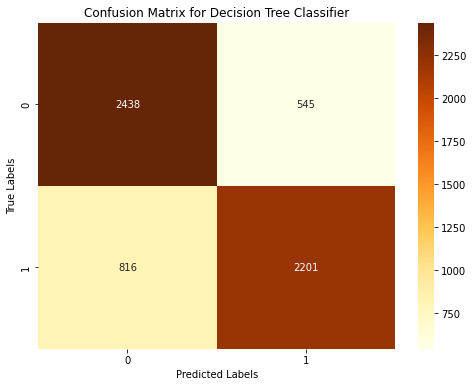

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      2983
           1       0.80      0.73      0.76      3017

    accuracy                           0.77      6000
   macro avg       0.78      0.77      0.77      6000
weighted avg       0.78      0.77      0.77      6000



In [22]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the Decision Tree model
dt = DecisionTreeClassifier()

# Train the model
dt.fit(x_train, y_train)

# Testing the algorithm and print accuracy
dt_score=accuracy = dt.score(x_test, y_test)
print("Accuracy:", accuracy)

# Make predictions on the test set
y_pred = dt.predict(x_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the metrics
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Generate and plot the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

# Generate and print the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


# AdaBoostClassifier

Accuracy: 0.7651666666666667
F1 Score: 0.7951141486113131
Precision: 0.7082901554404145
Recall: 0.9061982101425257


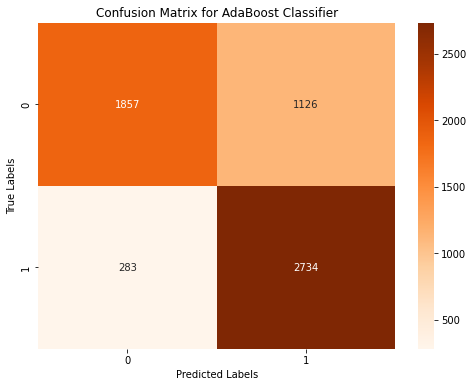

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.62      0.72      2983
           1       0.71      0.91      0.80      3017

    accuracy                           0.77      6000
   macro avg       0.79      0.76      0.76      6000
weighted avg       0.79      0.77      0.76      6000



In [23]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.ensemble import AdaBoostClassifier

# Create an instance of the AdaBoost model
adb = AdaBoostClassifier()

# Train the model
adb.fit(x_train, y_train)

# Testing the algorithm and print accuracy
adb_score=accuracy = adb.score(x_test, y_test)
print("Accuracy:", accuracy)

# Make predictions on the test set
y_pred = adb.predict(x_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the metrics
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Generate and plot the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for AdaBoost Classifier")
plt.show()

# Generate and print the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


#  ExtraTreesClassifier

Accuracy: 0.7886666666666666
F1 Score: 0.7847198641765705
Precision: 0.8043856595892795
Recall: 0.7659927079880676


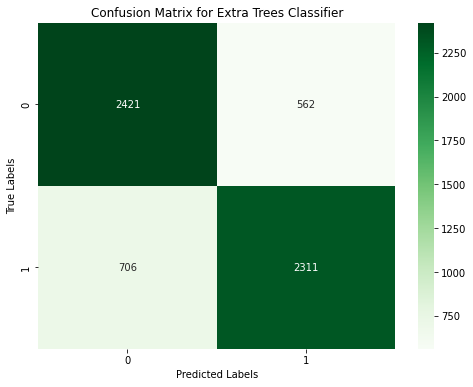

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      2983
           1       0.80      0.77      0.78      3017

    accuracy                           0.79      6000
   macro avg       0.79      0.79      0.79      6000
weighted avg       0.79      0.79      0.79      6000



In [24]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.ensemble import ExtraTreesClassifier

# Create an instance of the Extra Trees model
et = ExtraTreesClassifier()

# Train the model
et.fit(x_train, y_train)

# Testing the algorithm and print accuracy
et_score=accuracy = et.score(x_test, y_test)
print("Accuracy:", accuracy)

# Make predictions on the test set
y_pred = et.predict(x_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the metrics
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Generate and plot the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Extra Trees Classifier")
plt.show()

# Generate and print the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


# XGBClassifier

Accuracy: 0.792
F1 Score: 0.8099299421261041
Precision: 0.7492251338405185
Recall: 0.8813390785548558


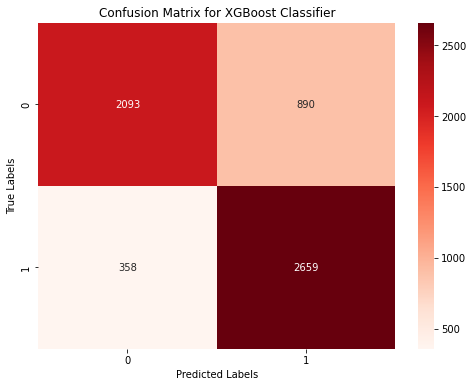

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.70      0.77      2983
           1       0.75      0.88      0.81      3017

    accuracy                           0.79      6000
   macro avg       0.80      0.79      0.79      6000
weighted avg       0.80      0.79      0.79      6000



In [25]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from xgboost import XGBClassifier

# Create an instance of the XGBoost model
xgb = XGBClassifier()

# Train the model
xgb.fit(x_train, y_train)

# Testing the algorithm and print accuracy
xgb_score=accuracy = xgb.score(x_test, y_test)
print("Accuracy:", accuracy)

# Make predictions on the test set
y_pred = xgb.predict(x_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the metrics
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Generate and plot the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for XGBoost Classifier")
plt.show()

# Generate and print the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


# LogisticRegression

Accuracy: 0.7885
F1 Score: 0.792273694549026
Precision: 0.7826649417852523
Recall: 0.8021213125621478


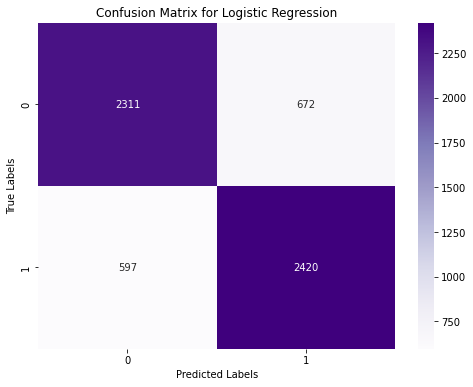

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      2983
           1       0.78      0.80      0.79      3017

    accuracy                           0.79      6000
   macro avg       0.79      0.79      0.79      6000
weighted avg       0.79      0.79      0.79      6000



In [26]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
lr = LogisticRegression()

# Train the model
lr.fit(x_train, y_train)

# Testing the algorithm and print accuracy
lr_score=accuracy = lr.score(x_test, y_test)
print("Accuracy:", accuracy)

# Make predictions on the test set
y_pred = lr.predict(x_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the metrics
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Generate and plot the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Generate and print the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.7826666666666666
F1 Score: 0.7705033438929955
Precision: 0.8213883677298311
Recall: 0.7255551872721246


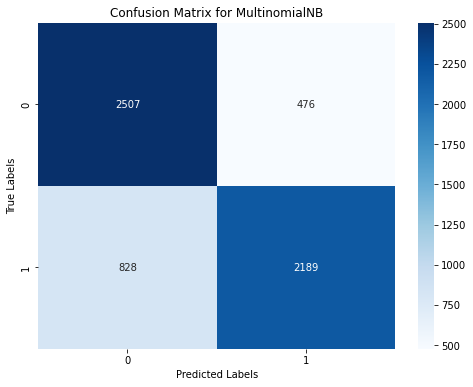

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79      2983
           1       0.82      0.73      0.77      3017

    accuracy                           0.78      6000
   macro avg       0.79      0.78      0.78      6000
weighted avg       0.79      0.78      0.78      6000



In [27]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB

# Create an instance of the MultinomialNB model
mnb = MultinomialNB()

# Train the model
mnb.fit(x_train, y_train)

# Testing the algorithm and print accuracy
mnb_score=accuracy = mnb.score(x_test, y_test)
print("Accuracy:", accuracy)

# Make predictions on the test set
y_pred = mnb.predict(x_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the metrics
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Generate and plot the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for MultinomialNB")
plt.show()

# Generate and print the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


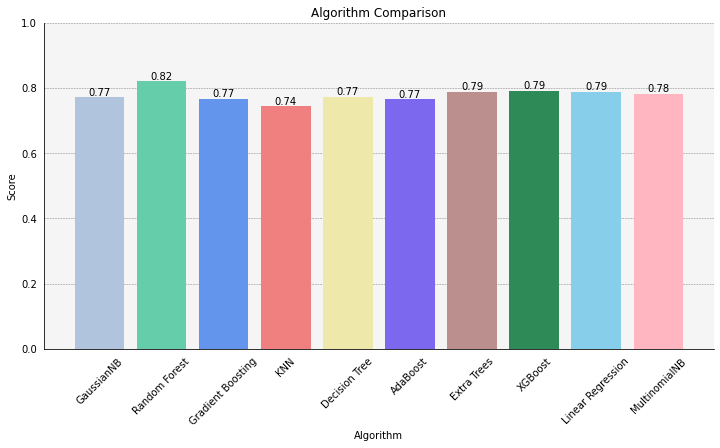

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Define the algorithm names and their corresponding scores
algorithm_names = ['GaussianNB', 'Random Forest', 'Gradient Boosting', 'KNN', 'Decision Tree', 'AdaBoost', 'Extra Trees', 'XGBoost', 'Linear Regression', 'MultinomialNB']
scores = [ga_score, rf_score, gb_score, knn_score, dt_score, adb_score, et_score, xgb_score, lr_score, mnb_score]

# Define the color palette for the bars
colors = ['lightsteelblue', 'mediumaquamarine', 'cornflowerblue', 'lightcoral', 'palegoldenrod', 'mediumslateblue', 'rosybrown', 'seagreen', 'skyblue', 'lightpink']

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(algorithm_names, scores, color=colors)

# Add the scores on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom', fontsize=10)

plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.title('Algorithm Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1

# Customize the plot aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.gca().set_axisbelow(True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
plt.gca().set_facecolor('whitesmoke')

plt.show()
